In [3]:
# general 
import pandas as pd 
import numpy as np 
from datetime import datetime

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# data processing
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

# prediction model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 10)

In [4]:
genre = "horror"

In [5]:
# reads the data
df = pd.read_csv(genre + "AnalysisData.csv")
df['date'] = pd.to_datetime(df.apply(lambda x: datetime.strptime(f"{int(x['year'])}-{int(x['month'])}", '%Y-%m').date(), axis=1))
df = df.drop(columns = ['month', 'year'])
df = df.set_index("date").asfreq('MS')

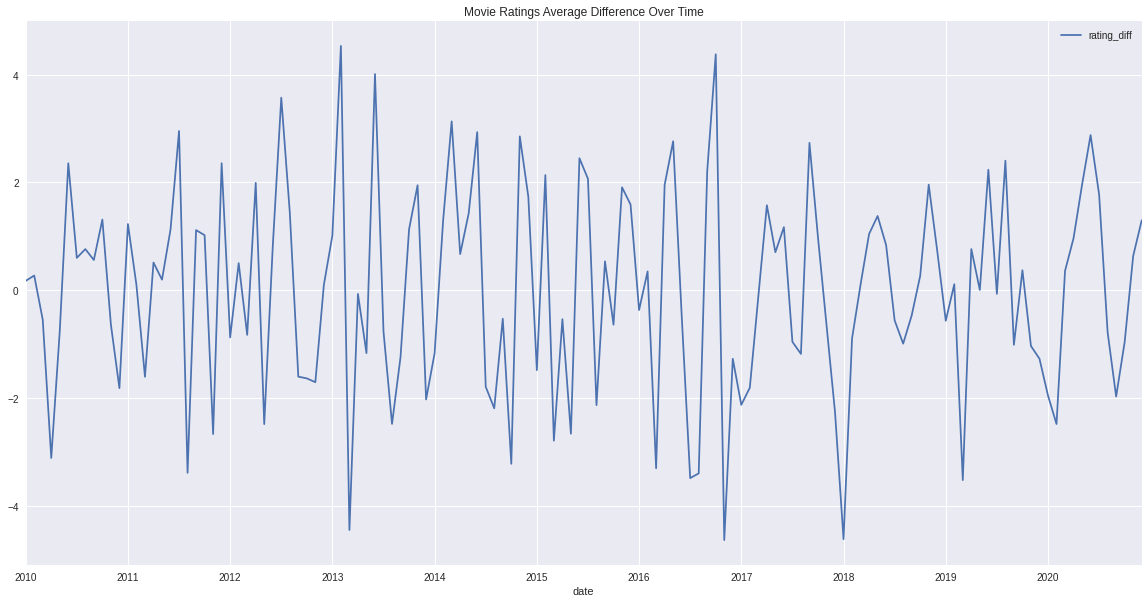

In [6]:
# regular plot
df.plot(y='rating_diff', 
        title='Movie Ratings Average Difference Over Time',
        figsize=(20,10));

In [8]:
# convert the data into decimal numbers between 0 and 1 for the data
# to have a small magnitude

scaler = MinMaxScaler()
train = df.iloc[:]
scaler.fit(train)

MinMaxScaler()

In [119]:
# using rolling forecast origin
amount = 12
trainer = scaler.transform(train)
# predict data for the next 5 years
for i in range(2021, 2026):
  # predict data for the year iteration
  predictions = []
  for j in range(amount):
    train_data = trainer[:-(amount-j)]
    model = SARIMAX(train_data, order=(1,0,1), seasonal_order=(0,1,0,12))
    model_fit = model.fit()

    pred = model_fit.forecast()
    predictions.append(pred)

  # after getting the prediction for the iteration year append it to the trainer data  
  np.append(trainer, prediction)
  
  # append the new data to the dataframe
  predictions = np.reshape(predictions, (-1, 1))
  predictions = scaler.inverse_transform(predictions)
  df1 = pd.DataFrame()
  df1['month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
  df1['year'] = [i for z in range(12)]
  df1['rating_diff'] = predictions
  df1['date'] = pd.to_datetime(df1.apply(lambda x: datetime.strptime(f"{int(x['year'])}-{int(x['month'])}", '%Y-%m').date(), axis=1))
  df1 = df1.drop(columns = ['month', 'year'])
  df1 = df1.set_index("date").asfreq('MS')
  df = df.append(df1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: User

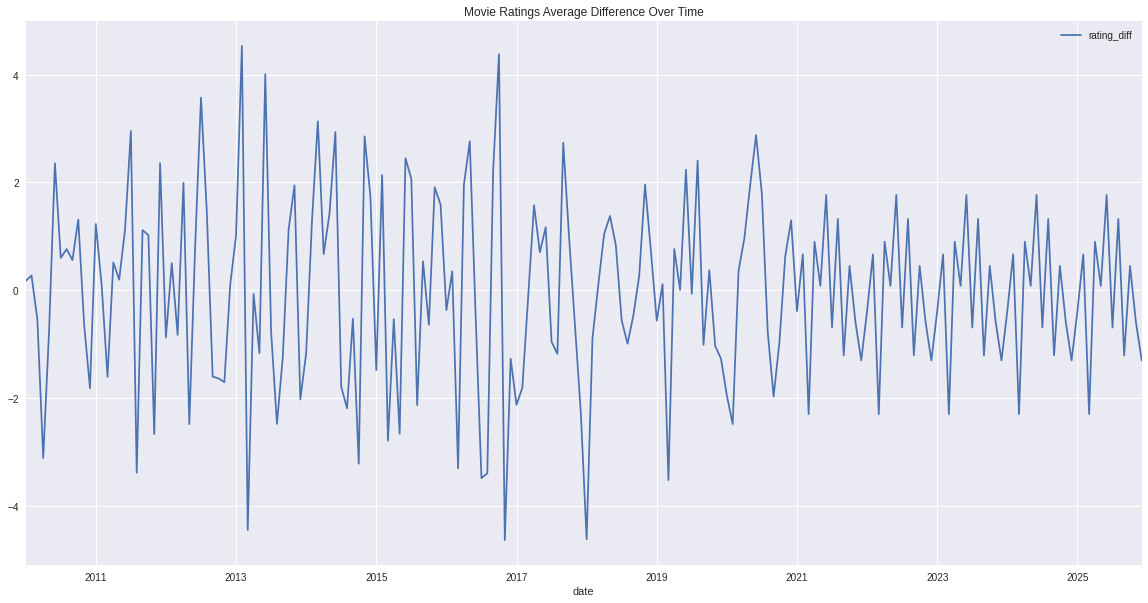

In [120]:
# regular plot
df.plot(y='rating_diff', 
        title='Movie Ratings Average Difference Over Time',
        figsize = (20, 10));

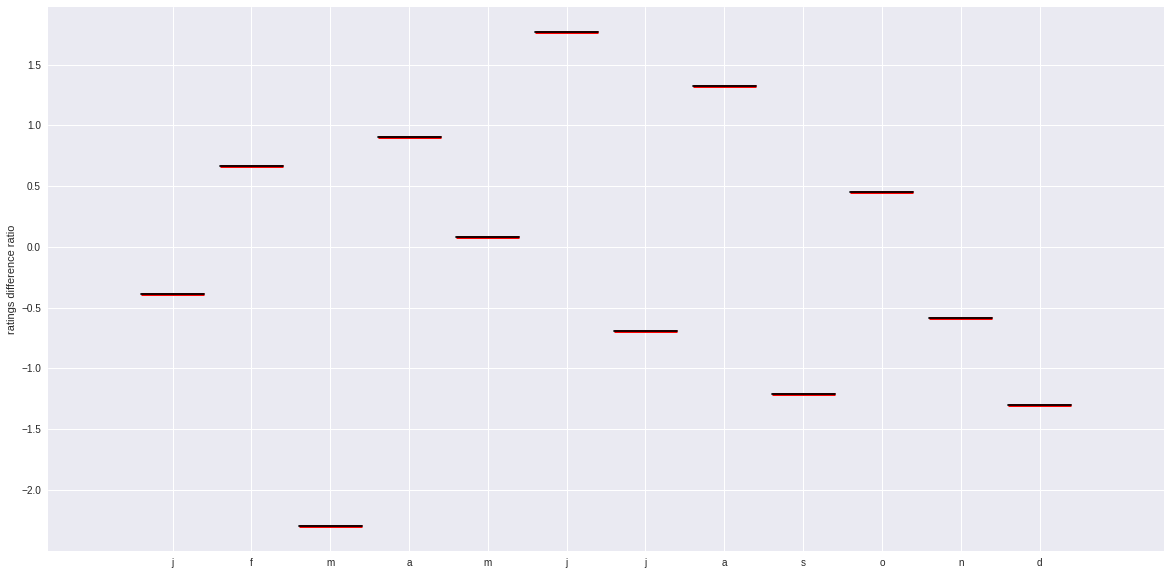

In [121]:
# month plot
plt.rc("figure", figsize=(20,10))
data = df.iloc[-60:]
month_plot(data["rating_diff"], ylabel='ratings difference ratio');

In [123]:
# perform adfuller test to see the statistics of the data

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value: ", dftest[1])
    print("3. Num of Lags: ", dftest[2])
    print("4. Num of Observation Used For ADF Regression and Critical Values of Calculation: ", dftest[3])
    print("5. Critical Values: ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
    return dftest

ad_test(df['rating_diff'])

1. ADF:  -4.8581607747090505
2. P-Value:  4.2039288330109566e-05
3. Num of Lags:  11
4. Num of Observation Used For ADF Regression and Critical Values of Calculation:  180
5. Critical Values: 
	 1% :  -3.4672111510631
	 5% :  -2.877734766803841
	 10% :  -2.575403364197531


(-4.8581607747090505,
 4.2039288330109566e-05,
 11,
 180,
 {'1%': -3.4672111510631, '10%': -2.575403364197531, '5%': -2.877734766803841},
 684.1468823568079)